# Superstore Sales Analysis — SQL & Python Case Study

**Author:** Krupal Joshi  
**Role:** Data Analyst  
**Tools & Technologies:** Python, Pandas, Matplotlib, seaborn, datetime  
**Environment:** Jupyter Notebook / VS Code  
**Dataset Source:** Kaggle — Superstore Sales Data

---

## Overview

This notebook presents an end-to-end **exploratory and analytical case study** on retail superstore sales data.  
The primary objective of this analysis is to leverage **SQL-driven querying combined with Python-based analysis and visualization** to extract actionable business insights from structured sales data.

The workflow followed in this notebook includes:
- Loading and exploring the dataset using Python
- Executing analytical SQL queries on the data
- Validating results using Pandas
- Visualizing trends and patterns using Matplotlib
- Exporting query outputs for reporting and downstream use

---

## Business Objectives

The analysis is designed to answer critical business questions related to:
- Revenue contribution across products, categories, and regions
- Temporal sales trends at yearly and monthly levels
- Customer-level revenue concentration
- Regional performance comparison
- The relationship between discounting strategies and profitability

---

## Key Analytical Questions Addressed

- Which **products and categories** contribute the highest revenue?
- How do **sales and revenue trends evolve over time**?
- Who are the **top-performing customers** by sales value?
- Which **regions and markets** consistently drive performance?
- At what point do **discounts negatively impact profit margins**?

---

## Key Insights Generated

- Revenue is disproportionately concentrated among a limited set of products and customers
- Seasonal patterns are clearly visible in monthly sales performance
- Certain regions consistently outperform others in both sales and profitability
- Excessive discounting leads to margin erosion beyond an optimal threshold

---

## Deliverables from This Notebook

- Executed SQL queries with business logic
- Cleaned and structured query outputs
- Exported CSV files for further analysis
- Saved visualizations (PNG format) for reporting and presentations

---

This notebook serves as a **practical demonstration of SQL + Python analytics skills**, emphasizing structured problem-solving, data-driven decision-making, and business-focused storytelling.


## **Pre-Processing**

In [2]:
# Import libs
import pandas as pd
import numpy as np

from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as mticker
from matplotlib.colors import TwoSlopeNorm, LinearSegmentedColormap

In [3]:
# Import csv and view the first 5 entriesimport pandas as pd

df_raw = pd.read_csv(
    "C:\\Users\\Krupal\\Downloads\\Sample - Superstore.csv",
    sep=",",
    encoding="latin1"
)


df_raw.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# View the DataFrame size
print(f'Linhas: {df_raw.shape[0]}')
print(f'Colunas: {df_raw.shape[1]}')

Linhas: 9994
Colunas: 21


In [5]:
# Check existing columns
df_raw.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
# Checking the count of NaN values
df_raw.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
# Check general dataset information
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
# Check for duplicate data
df_raw.duplicated().sum()

np.int64(0)

In [9]:
# Check the number of unique values per column
df_raw.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

In [10]:
# Make a copy of the original dataset and rename columns
renamed_columns = {
    'Row ID': 'row_id',
    'Order ID': 'order_id',
    'Order Date': 'order_date',
    'Ship Date': 'ship_date',
    'Ship Mode': 'ship_mode',
    'Customer ID': 'customer_id',
    'Customer Name': 'customer_name',
    'Segment': 'segment',
    'Country': 'country',
    'City': 'city',
    'State': 'state',
    'Postal Code': 'postal_code',
    'Region': 'region',
    'Product ID': 'product_id',
    'Category': 'category',
    'Sub-Category': 'sub_category',
    'Product Name': 'product_name',
    'Sales': 'sales',
    'Quantity': 'quantity',
    'Discount': 'discount',
    'Profit': 'profit'
}

df = df_raw.rename(columns=renamed_columns)

In [11]:
# Change column data types
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

df.dtypes

row_id                    int64
order_id                 object
order_date       datetime64[ns]
ship_date        datetime64[ns]
ship_mode                object
customer_id              object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code               int64
region                   object
product_id               object
category                 object
sub_category             object
product_name             object
sales                   float64
quantity                  int64
discount                float64
profit                  float64
dtype: object

In [12]:
# Drop row_id - we won't be using it
df = df.drop('row_id', axis=1)

# Create 'profit_margin' column
df['profit_margin'] = (df['profit'] / df['sales']) * 100

# Create 'year' column
df['year'] = df['order_date'].dt.year

# Create 'year_month' column
df['year_month'] = df['order_date'].dt.to_period('M')

# Create 'shipping_time' column
df['shipping_time'] = df['ship_date'] - df['order_date']

display(df)

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,...,sub_category,product_name,sales,quantity,discount,profit,profit_margin,year,year_month,shipping_time
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,16.00,2016,2016-11,3 days
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,30.00,2016,2016-11,3 days
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,47.00,2016,2016-06,4 days
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-40.00,2015,2015-10,7 days
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.25,2015,2015-10,7 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,...,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,16.25,2014,2014-01,2 days
9990,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,17.00,2017,2017-02,5 days
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,7.50,2017,2017-02,5 days
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,45.00,2017,2017-02,5 days


## **General Analysis**

In [13]:
# Total Company Revenue and Profit
total_sales = df['sales'].sum()
total_profit = df['profit'].sum()
total_costs = total_sales - total_profit

print(f'Period: {df["year"].min()} - {df["year"].max()}')
print(f'Total Revenue: ${total_sales:,.2f}')
print(f'Total Cost: ${total_costs:,.2f}')  
print(f'Total Profit: ${total_profit:,.2f}') 

# Find information
monthly_profit = df.groupby(by=['year_month'])['profit'].sum()

max_profit_month = monthly_profit.idxmax()
max_profit_value = monthly_profit.max()

min_profit_month = monthly_profit.idxmin()
min_profit_value = monthly_profit.min()

print(f'The most profitable month was: {max_profit_month} with a profit of {max_profit_value}')
print(f'The month with the biggest loss was: {min_profit_month} with a result of {min_profit_value}')


Period: 2014 - 2017
Total Revenue: $2,297,200.86
Total Cost: $2,010,803.84
Total Profit: $286,397.02
The most profitable month was: 2016-12 with a profit of 17885.3093
The month with the biggest loss was: 2015-01 with a result of -3281.007


## **Analysis by Segment**

##### 1. What is the order of segments with the highest sales and highest profits?

In [14]:
# Segmentos mais lucrativos
segment_analysis = df.groupby(by=['segment'], as_index=False) \
                     .agg(
                        sales=('sales', 'sum'),
                        profit=('profit', 'sum')
                         ) \
                     .sort_values(by='profit', ascending=False)

segment_analysis

,segment,sales,profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.296531e+05,60298.6785


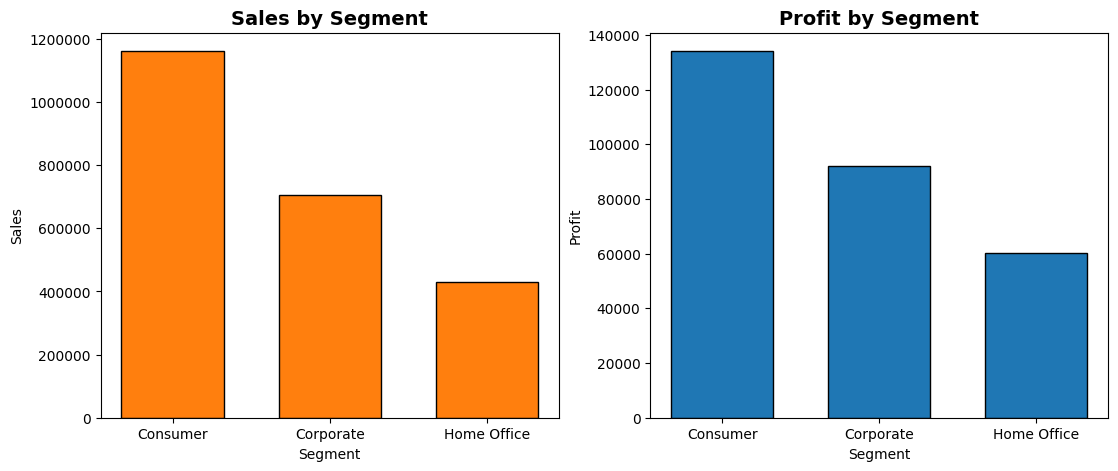

In [15]:
sales_color ='#FF7F0E'
profit_color ='#1f77b4'

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,5))

ax1.bar(segment_analysis['segment'],segment_analysis['sales'], color=sales_color, edgecolor='black', width=0.65)
ax1.set_title('Sales by Segment', fontsize=14, fontweight='bold')
ax1.set_xlabel('Segment')
ax1.set_ylabel('Sales')
ax1.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=False))
ax1.ticklabel_format(style='plain', axis='y')

ax2.bar(segment_analysis['segment'], segment_analysis['profit'], color=profit_color, edgecolor='black', width=0.65)
ax2.set_title('Profit by Segment', fontsize=14, fontweight='bold')
ax2.set_xlabel('Segment')
ax2.set_ylabel('Profit');

## **Analysis by Region**

#### Region

##### 1. Which region has the highest profit/sales?

In [16]:
# Region - Revenue/Profit
region_analysis = df.groupby(by=['region'], as_index=False) \
                    .agg(
                            total_sales=('sales', 'sum'),
                            total_profit=('profit', 'sum')
                    ) \
                    .sort_values(by='total_sales', ascending=False) \
                    .reset_index(drop=True)

region_analysis

,region,total_sales,total_profit
0,West,725457.8245,108418.4489
1,East,678781.2400,91522.7800
2,Central,501239.8908,39706.3625
3,South,391721.9050,46749.4303


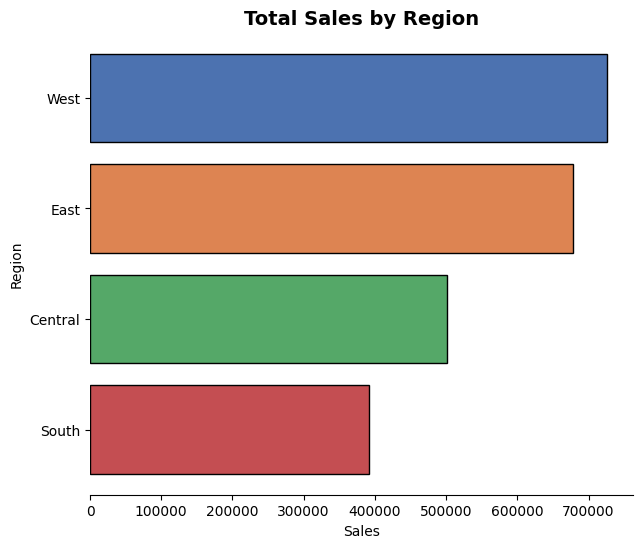

In [17]:
fig, ax = plt.subplots(figsize=(7,6))

colors = sns.color_palette('deep', n_colors=len(region_analysis))

ax.barh(region_analysis['region'], region_analysis['total_sales'], color=colors, edgecolor='black')
ax.invert_yaxis()
ax.set_title('Total Sales by Region', fontsize=14, fontweight='bold')
ax.set_xlabel('Sales')
ax.set_ylabel('Region')
for spine in ['left','right','top']:
    ax.spines[spine].set_visible(False)

##### 2. How are sales distributed by category within each region?

In [18]:
# Total sales by category and region
sales_by_region_category = df.groupby(by=['region', 'category'], as_index=False) \
                             .agg(
                                 total_sales=('sales', 'sum')
                             ) \
                             .sort_values(by=['region', 'total_sales'], ascending=False)

sales_by_region_category

,region,category,total_sales
9,West,Furniture,252612.7435
11,West,Technology,251991.8320
10,West,Office Supplies,220853.2490
8,South,Technology,148771.9080
7,South,Office Supplies,125651.3130
6,South,Furniture,117298.6840
5,East,Technology,264973.9810
3,East,Furniture,208291.2040
4,East,Office Supplies,205516.0550
2,Central,Technology,170416.3120


#### States

##### 1. Which states have the highest total sales values?

In [19]:
# Top 10 States with the highest total sales
top10_state_sales = df.groupby(by=['state'])['sales'].sum().sort_values(ascending=False).head(10)

top10_state_sales

state
California      457687.6315
New York        310876.2710
Texas           170188.0458
Washington      138641.2700
Pennsylvania    116511.9140
Florida          89473.7080
Illinois         80166.1010
Ohio             78258.1360
Michigan         76269.6140
Virginia         70636.7200
Name: sales, dtype: float64

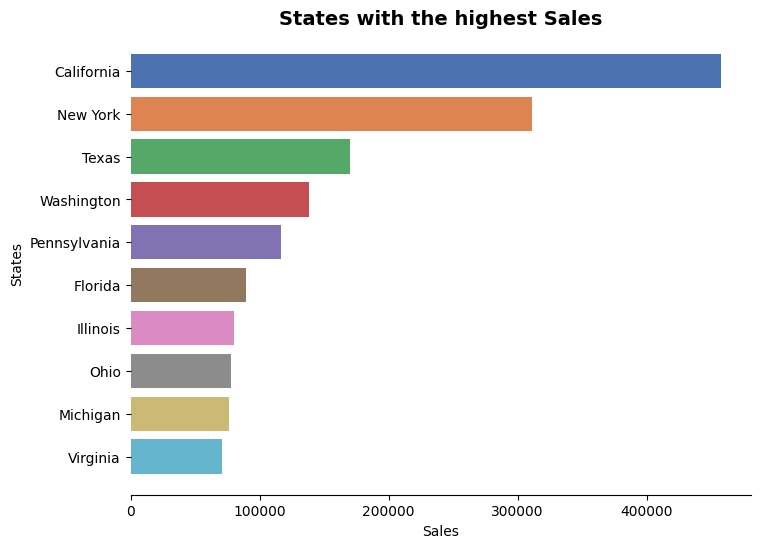

In [20]:
fig, ax = plt.subplots(figsize=(8,6))

colors = sns.color_palette('deep', n_colors=10)

ax.barh(top10_state_sales.index, top10_state_sales.values, color=colors)
ax.invert_yaxis()
ax.set_title('States with the highest Sales', fontsize=14, fontweight='bold')
ax.set_xlabel('Sales')
ax.set_ylabel('States')
for spine in ['left','right','top']:
    ax.spines[spine].set_visible(False)

##### 2. Which states are showing the biggest losses?

In [21]:
# States with the biggest loss
top10_loss_states = df.groupby('state')['profit'].sum().sort_values().head(10)

top10_loss_states

state
Texas            -25729.3563
Ohio             -16971.3766
Pennsylvania     -15559.9603
Illinois         -12607.8870
North Carolina    -7490.9122
Colorado          -6527.8579
Tennessee         -5341.6936
Arizona           -3427.9246
Florida           -3399.3017
Oregon            -1190.4705
Name: profit, dtype: float64

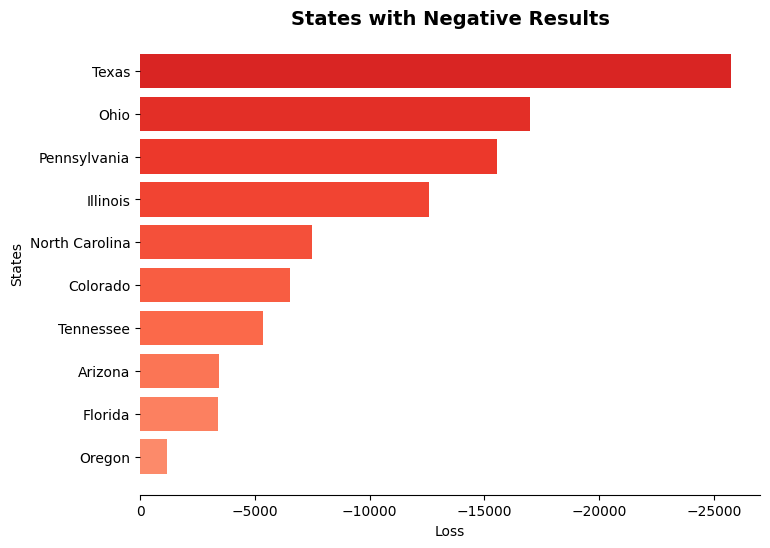

In [22]:
fig, ax = plt.subplots(figsize=(8,6))

cmap = cm.Reds
red_colors = [cmap(i) for i in np.linspace(0.7, 0.4, len(top10_loss_states))]

ax.barh(top10_loss_states.index, top10_loss_states.values, color=red_colors)
ax.invert_yaxis()
ax.invert_xaxis()
ax.set_title('States with Negative Results', fontsize=14, fontweight='bold')
ax.set_xlabel('Loss')
ax.set_ylabel('States')
for spine in ['left','right','top']:
    ax.spines[spine].set_visible(False)

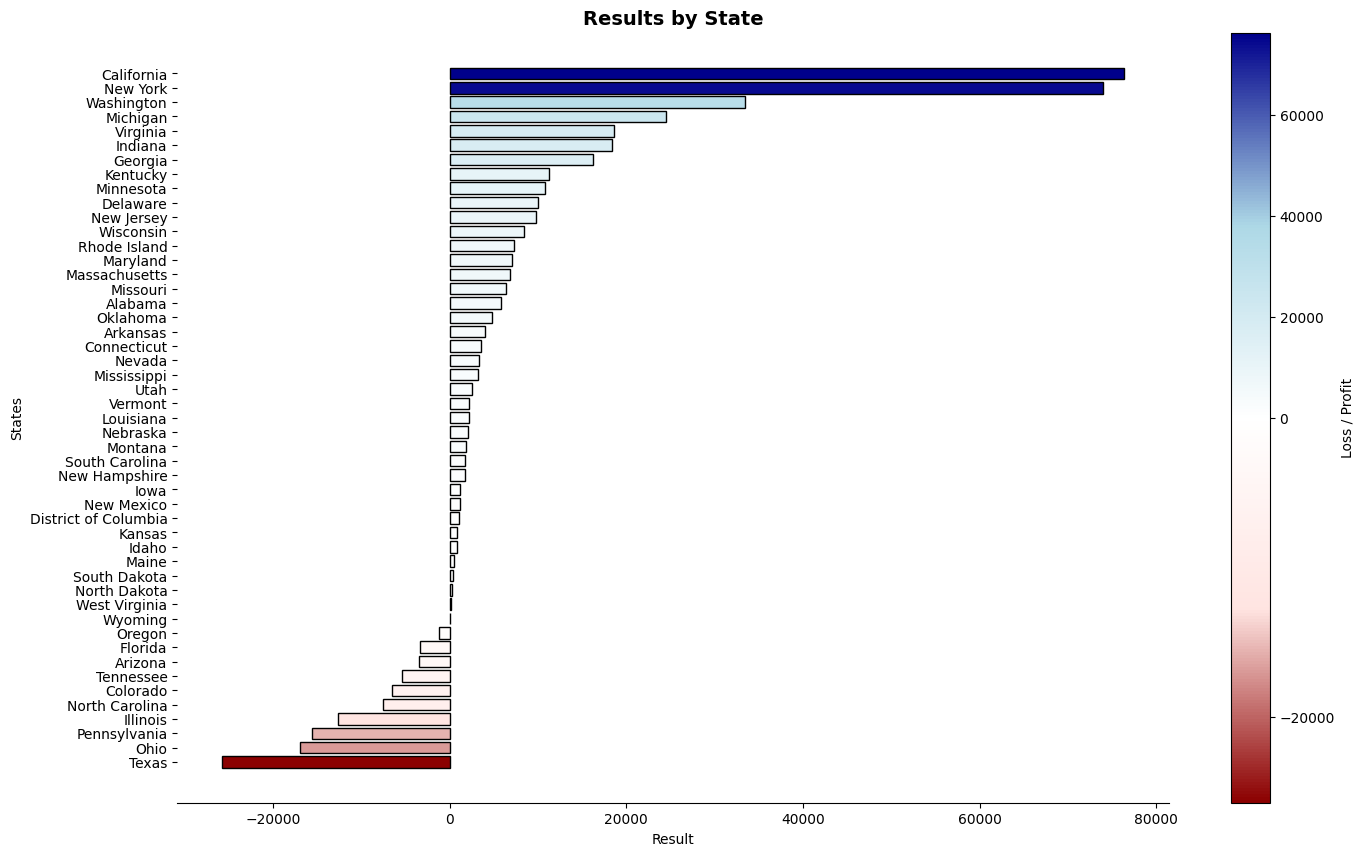

In [23]:
states_overview = df.groupby('state')['profit'].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(16,10))

# Define the colormap: blue → white → red
cmap = LinearSegmentedColormap.from_list(
    "custom_div", ["darkred", "mistyrose", "white", "lightblue", "darkblue"]
)

norm = TwoSlopeNorm(vmin=states_overview.min(), vcenter=0, vmax=states_overview.max())

colors = cmap(norm(states_overview.values))

ax.barh(states_overview.index, states_overview.values, color=colors, edgecolor='black')

ax.invert_yaxis()
ax.set_title('Results by State', fontsize=14, fontweight='bold')
ax.set_xlabel('Result')
ax.set_ylabel('States')

# Remove extra borders
for spine in ['left','right','top']:
    ax.spines[spine].set_visible(False)

# Add color bar for reference
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label="Loss / Profit");

#### Cities

##### 1. Which cities have the highest total sales values?

In [24]:
city_sales = df.groupby(by=['city'])['sales'].sum().sort_values(ascending=False).head(10)

city_sales

city
New York City    256368.1610
Los Angeles      175851.3410
Seattle          119540.7420
San Francisco    112669.0920
Philadelphia     109077.0130
Houston           64504.7604
Chicago           48539.5410
San Diego         47521.0290
Jacksonville      44713.1830
Springfield       43054.3420
Name: sales, dtype: float64

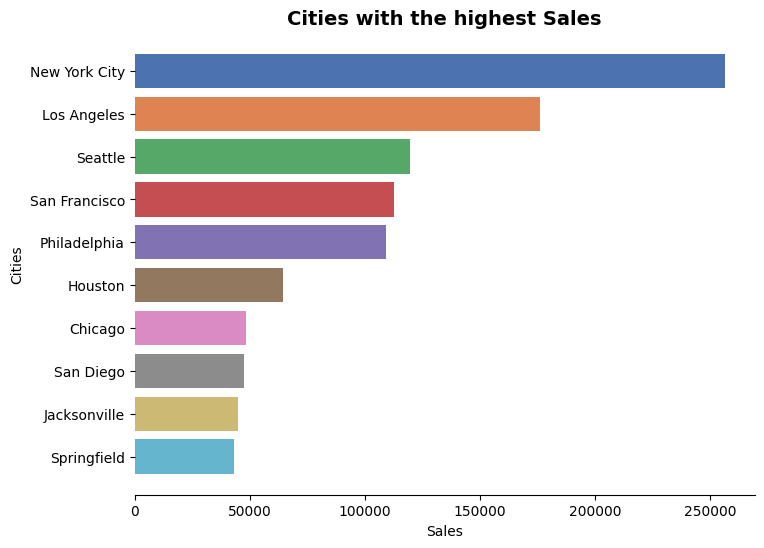

In [25]:
fig, ax = plt.subplots(figsize=(8,6))

colors = sns.color_palette('deep', n_colors=10)

ax.barh(city_sales.index, city_sales.values, color=colors)
ax.invert_yaxis()
ax.set_title('Cities with the highest Sales', fontsize=14, fontweight='bold')
ax.set_xlabel('Sales')
ax.set_ylabel('Cities')
for spine in ['left','right','top']:
    ax.spines[spine].set_visible(False)

##### 2. Which cities are the most profitable?

In [26]:
# Profit
top_profit_cities = df.groupby(by=['city'])['profit'].sum().sort_values(ascending=False).head(10)

top_profit_cities

city
New York City    62036.9837
Los Angeles      30440.7579
Seattle          29156.0967
San Francisco    17507.3854
Detroit          13181.7908
Lafayette        10018.3876
Jackson           7581.6828
Atlanta           6993.6629
Minneapolis       6824.5846
San Diego         6377.1960
Name: profit, dtype: float64

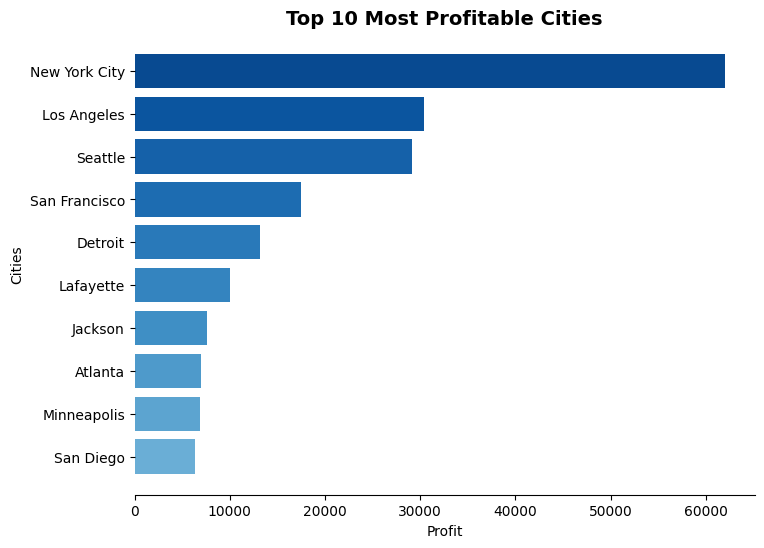

In [27]:
fig, ax = plt.subplots(figsize=(8,6))

cmap_blue = cm.Blues
blue_colors = [cmap_blue(i) for i in np.linspace(0.9, 0.5, len(top_profit_cities))]

ax.barh(top_profit_cities.index, top_profit_cities.values, color=blue_colors)
ax.invert_yaxis()
ax.set_title('Top 10 Most Profitable Cities', fontsize=14, fontweight='bold')
ax.set_xlabel('Profit')
ax.set_ylabel('Cities')
for spine in ['left','right','top']:
    ax.spines[spine].set_visible(False)

##### 3. Which cities are showing the biggest losses?

In [28]:
# Loss
top_loss_cities = df.groupby(by=['city'])['profit'].sum().sort_values().head(10)

top_loss_cities

city
Philadelphia   -13837.7674
Houston        -10153.5485
San Antonio     -7299.0502
Lancaster       -7239.0684
Chicago         -6654.5688
Burlington      -3622.8772
Dallas          -2846.5257
Phoenix         -2790.8832
Aurora          -2691.7386
Jacksonville    -2323.8350
Name: profit, dtype: float64

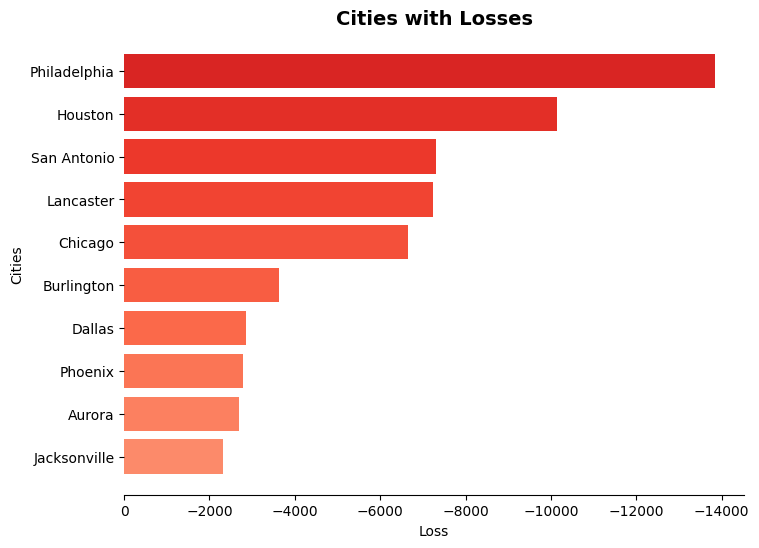

In [29]:
fig, ax = plt.subplots(figsize=(8,6))

cmap = cm.Reds
red_colors = [cmap(i) for i in np.linspace(0.7, 0.4, len(top_loss_cities))]

ax.barh(top_loss_cities.index, top_loss_cities.values, color=red_colors)
ax.invert_yaxis()
ax.invert_xaxis()
ax.set_title('Cities with Losses', fontsize=14, fontweight='bold')
ax.set_xlabel('Loss')
ax.set_ylabel('Cities')
for spine in ['left','right','top']:
    ax.spines[spine].set_visible(False)

## **Analysis by Customer**

##### 1. Who are the top 10 customers generating the most revenue (sales) for the company?

In [30]:
# Top 10 Customers with the highest total sales
sales_clients = df.groupby(by=['customer_name'])['sales'].sum().sort_values(ascending=False).head(10)

sales_clients

customer_name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: sales, dtype: float64

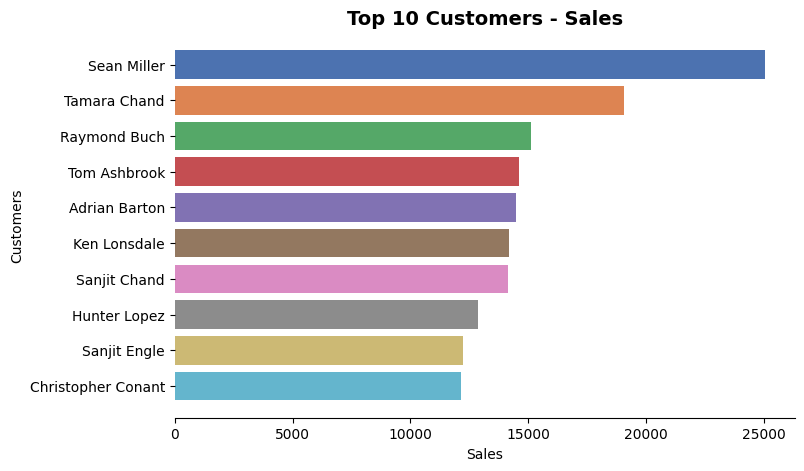

In [31]:
fig, ax = plt.subplots(figsize=(8,5))

colors = sns.color_palette('deep', n_colors=10)

ax.barh(sales_clients.index, sales_clients.values, color=colors)
ax.invert_yaxis()
ax.set_title('Top 10 Customers - Sales', fontsize=14, fontweight='bold')
ax.set_xlabel('Sales')
ax.set_ylabel('Customers')
for spine in ['left','right','top']:
    ax.spines[spine].set_visible(False)

##### 2. Who are the top 10 customers generating the highest profit for the company?

In [32]:
# Top 10 Customers with the highest total profit
profit_clients = df.groupby(by=['customer_name'])['profit'].sum().sort_values(ascending=False).head(10)

profit_clients

customer_name
Tamara Chand            8981.3239
Raymond Buch            6976.0959
Sanjit Chand            5757.4119
Hunter Lopez            5622.4292
Adrian Barton           5444.8055
Tom Ashbrook            4703.7883
Christopher Martinez    3899.8904
Keith Dawkins           3038.6254
Andy Reiter             2884.6208
Daniel Raglin           2869.0760
Name: profit, dtype: float64

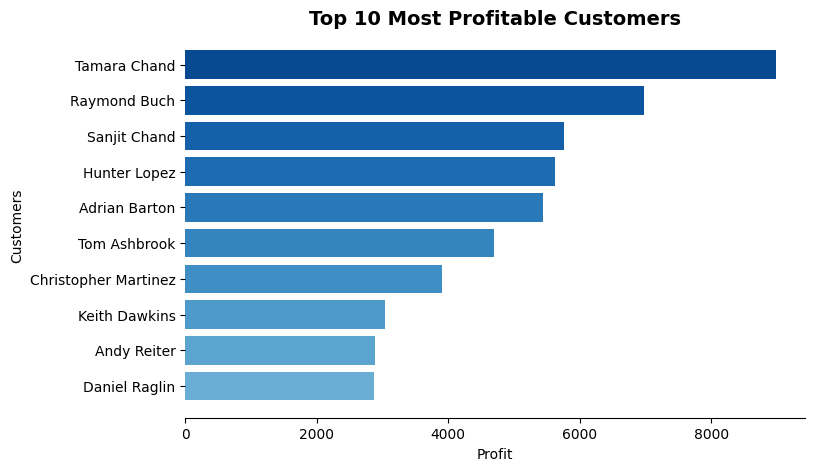

In [33]:
fig, ax = plt.subplots(figsize=(8,5))

cmap_blue = cm.Blues
blue_colors = [cmap_blue(i) for i in np.linspace(0.9, 0.5, len(profit_clients))]

ax.barh(profit_clients.index, profit_clients.values, color=blue_colors)
ax.invert_yaxis()
ax.set_title('Top 10 Most Profitable Customers', fontsize=14, fontweight='bold')
ax.set_xlabel('Profit')
ax.set_ylabel('Customers')
for spine in ['left','right','top']:
    ax.spines[spine].set_visible(False)

##### 3. What is the average ticket size per customer?

In [34]:
customer_sales = df.groupby(by=['customer_name'])['sales'].sum()

average_ticket_per_customer = customer_sales.mean()

print(f'Average Ticket Size per Customer: ${average_ticket_per_customer:.2f}')

Average Ticket Size per Customer: $2896.85


## **Analysis by Category**

#### Category

##### 1. What is the performance of sales and profitability (profit and margin) by product category?

In [35]:
# Sales, Profit, and Profit Margin by category
category_analysis = df.groupby(by=['category'], as_index=False) \
                      .agg(
                          {
                              'sales' : 'sum',
                              'profit' : 'sum',
                          }
                      ) \
                      .sort_values(by='sales', ascending=False)

category_analysis['profit_margin'] = (category_analysis['profit'] / category_analysis['sales']) * 100

category_analysis

,category,sales,profit,profit_margin
2,Technology,836154.0330,145454.9481,17.395712
0,Furniture,741999.7953,18451.2728,2.486695
1,Office Supplies,719047.0320,122490.8008,17.035158


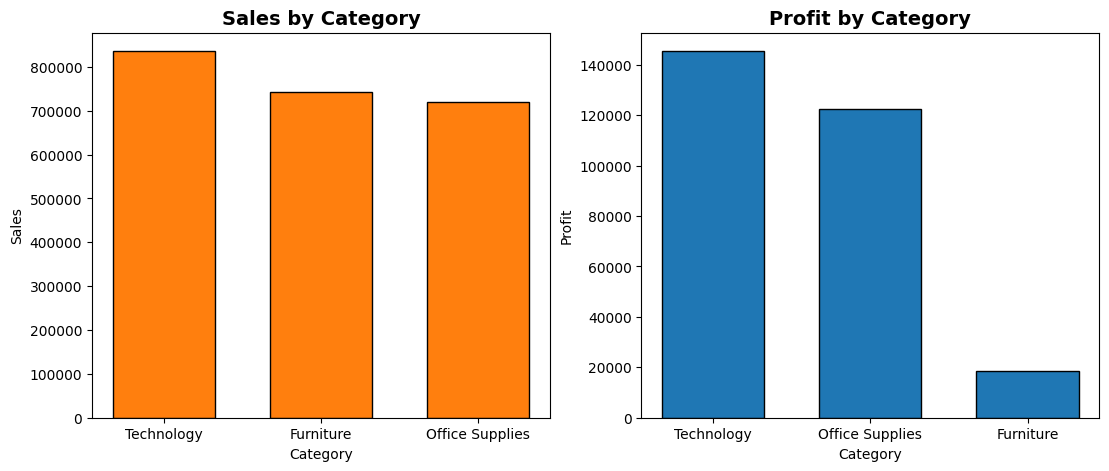

In [36]:
sorted_by_profit = category_analysis.sort_values(by='profit', ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))

ax1.bar(category_analysis['category'],category_analysis['sales'], color='#FF7F0E', edgecolor='black', width=0.65)
ax1.set_title('Sales by Category', fontsize=14, fontweight='bold')
ax1.set_xlabel('Category')
ax1.set_ylabel('Sales')

ax2.bar(sorted_by_profit['category'], sorted_by_profit['profit'], color='#1f77b4', edgecolor='black', width=0.65)
ax2.set_title('Profit by Category', fontsize=14, fontweight='bold')
ax2.set_xlabel('Category')
ax2.set_ylabel('Profit');

#### Sub-Category

##### 1. What is the performance of sales and profitability (profit and margin) by product sub-category?

In [37]:
sub_category_analysis = df.groupby(by=['sub_category'], as_index=False) \
                          .agg(
                              {
                                  'sales' : 'sum',
                                  'profit' : 'sum',
                              }
                          ) \
                          .sort_values(by='sales', ascending=False)

sub_category_analysis['profit_margin'] = (sub_category_analysis['profit'] / sub_category_analysis['sales']) * 100

sub_category_analysis

,sub_category,sales,profit,profit_margin
13,Phones,330007.0540,44515.7306,13.489327
5,Chairs,328449.1030,26590.1663,8.095673
14,Storage,223843.6080,21278.8264,9.506113
16,Tables,206965.5320,-17725.4811,-8.564460
3,Binders,203412.7330,30221.7633,14.857361
11,Machines,189238.6310,3384.7569,1.788618
0,Accessories,167380.3180,41936.6357,25.054700
6,Copiers,149528.0300,55617.8249,37.195585
4,Bookcases,114879.9963,-3472.5560,-3.022768
1,Appliances,107532.1610,18138.0054,16.867517


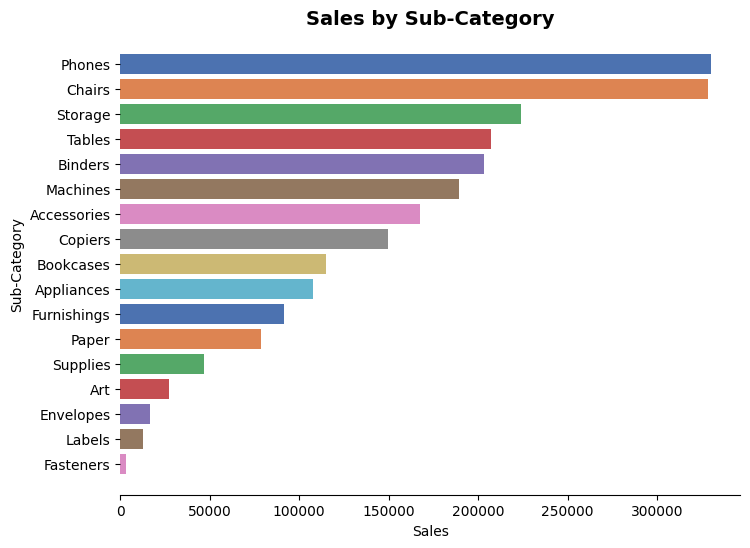

In [38]:
fig, ax = plt.subplots(figsize=(8,6))

colors = sns.color_palette('deep', n_colors=17)

ax.barh(sub_category_analysis['sub_category'], sub_category_analysis['sales'], color=colors)
ax.invert_yaxis()
ax.set_title('Sales by Sub-Category', fontsize=14, fontweight='bold')
ax.set_xlabel('Sales')
ax.set_ylabel('Sub-Category')
for spine in ['left','right','top']:
    ax.spines[spine].set_visible(False)

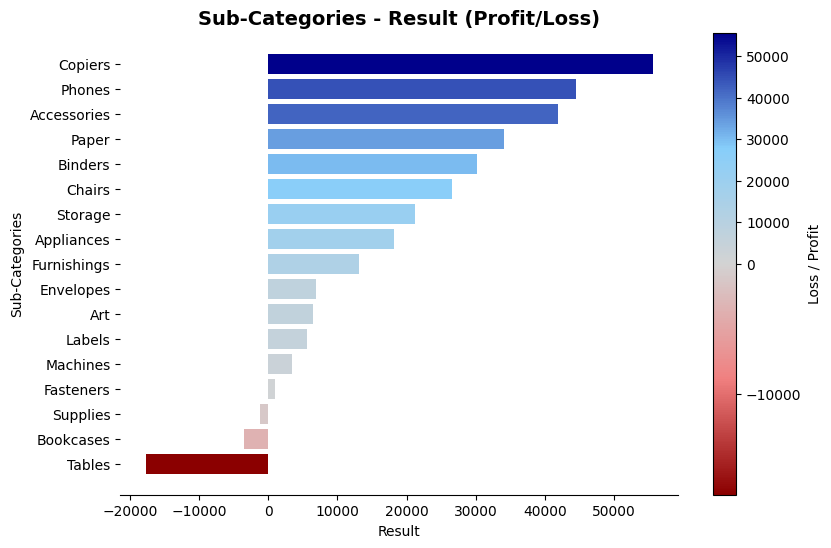

In [39]:
# Sorts profits in descending order
sorted_by_profit_sc = sub_category_analysis.sort_values(by='profit', ascending=False)

fig, ax = plt.subplots(figsize=(9,6))

# Define the colormap: dark red (loss) → white (neutral) → dark blue (profit)
cmap = LinearSegmentedColormap.from_list(
    "custom_div", ["darkred", "lightcoral", "#D3D3D3", "lightskyblue", "darkblue"]
)

norm = TwoSlopeNorm(vmin=sorted_by_profit_sc['profit'].min(), vcenter=0, vmax=sorted_by_profit_sc['profit'].max())

colors = cmap(norm(sorted_by_profit_sc['profit']))

ax.barh(sorted_by_profit_sc['sub_category'], sorted_by_profit_sc['profit'], color=colors)
ax.invert_yaxis()
ax.set_title('Sub-Categories - Result (Profit/Loss)', fontsize=14, fontweight='bold')
ax.set_xlabel('Result')
ax.set_ylabel('Sub-Categories')
for spine in ['left','right','top']:
    ax.spines[spine].set_visible(False)

# Add color bar for reference
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label="Loss / Profit");

#### Product

##### 1. What are the top 10 products with the highest total sales?

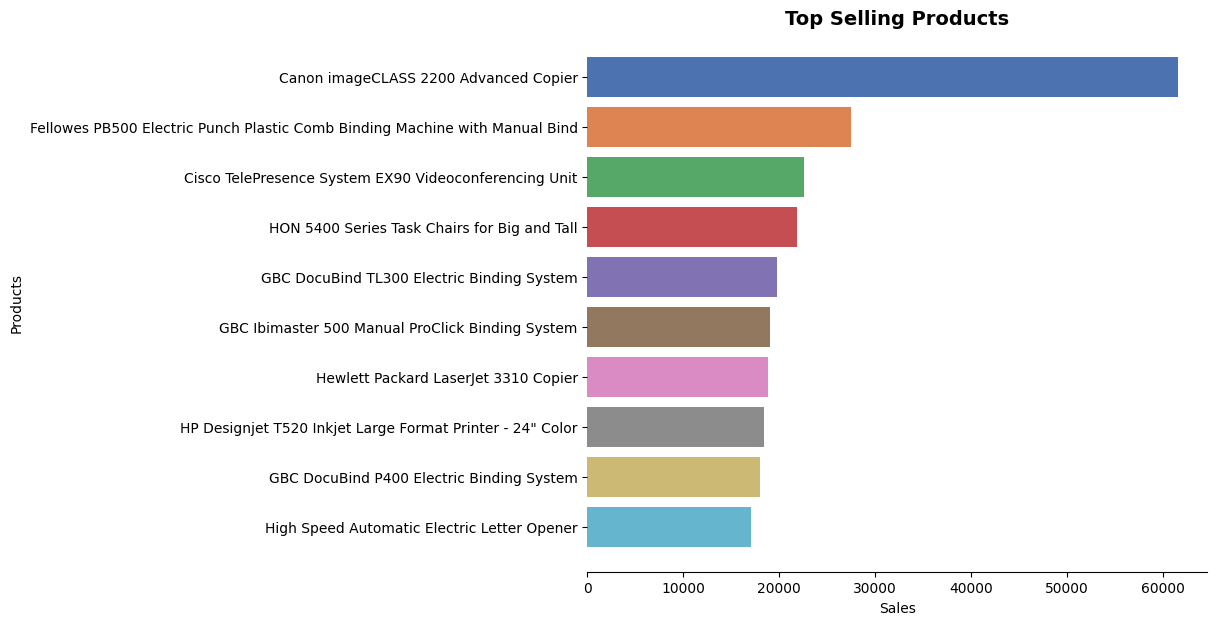

In [40]:
top_sales_products = df.groupby(by=['product_name'])['sales'].sum().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(8,7))

colors = sns.color_palette('deep', n_colors=10)

ax.barh(top_sales_products.index, top_sales_products.values, color=colors)
ax.invert_yaxis()
ax.set_title('Top Selling Products', fontsize=14, fontweight='bold')
ax.set_xlabel('Sales')
ax.set_ylabel('Products')
for spine in ['left','right','top']:
    ax.spines[spine].set_visible(False)

##### 2. What are the top 10 most profitable products?

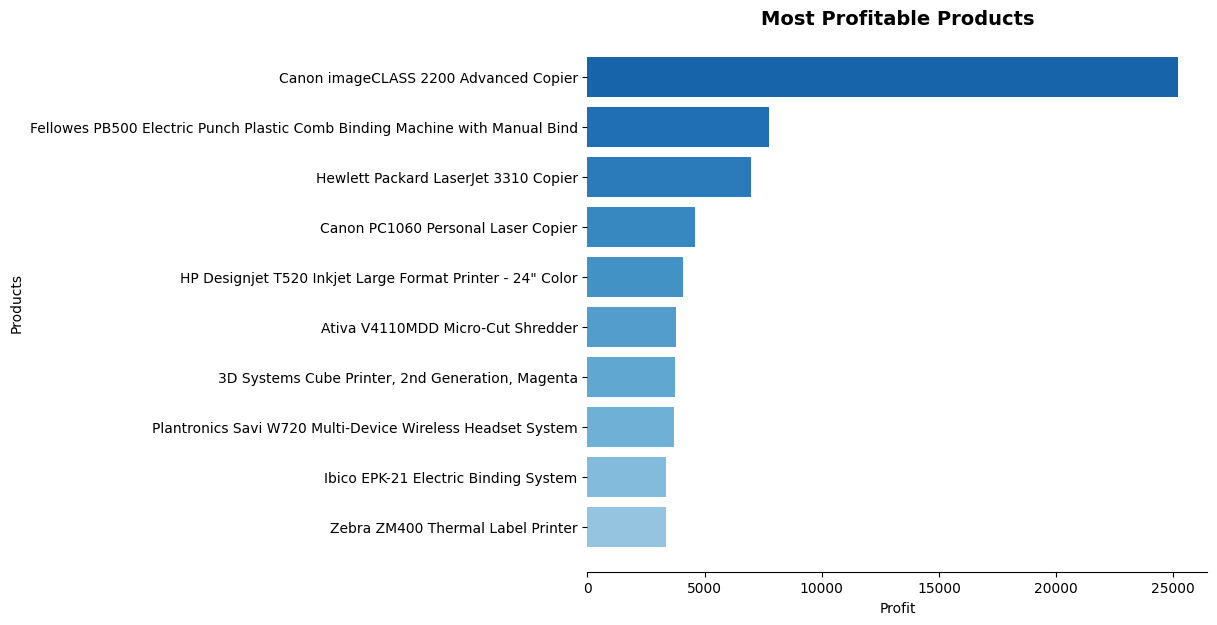

In [41]:
top_profit_products = df.groupby(by=['product_name'])['profit'].sum().sort_values(ascending=False).head(10)

cmap_blue = cm.Blues
blue_colors = [cmap_blue(i) for i in np.linspace(0.8, 0.4, len(profit_clients))]

fig, ax = plt.subplots(figsize=(8,7))

ax.barh(top_profit_products.index, top_profit_products.values, color=blue_colors)
ax.invert_yaxis()
ax.set_title('Most Profitable Products', fontsize=14, fontweight='bold')
ax.set_xlabel('Profit')
ax.set_ylabel('Products')
for spine in ['left','right','top']:
    ax.spines[spine].set_visible(False)

##### 3. What are the top 10 products with the biggest loss?

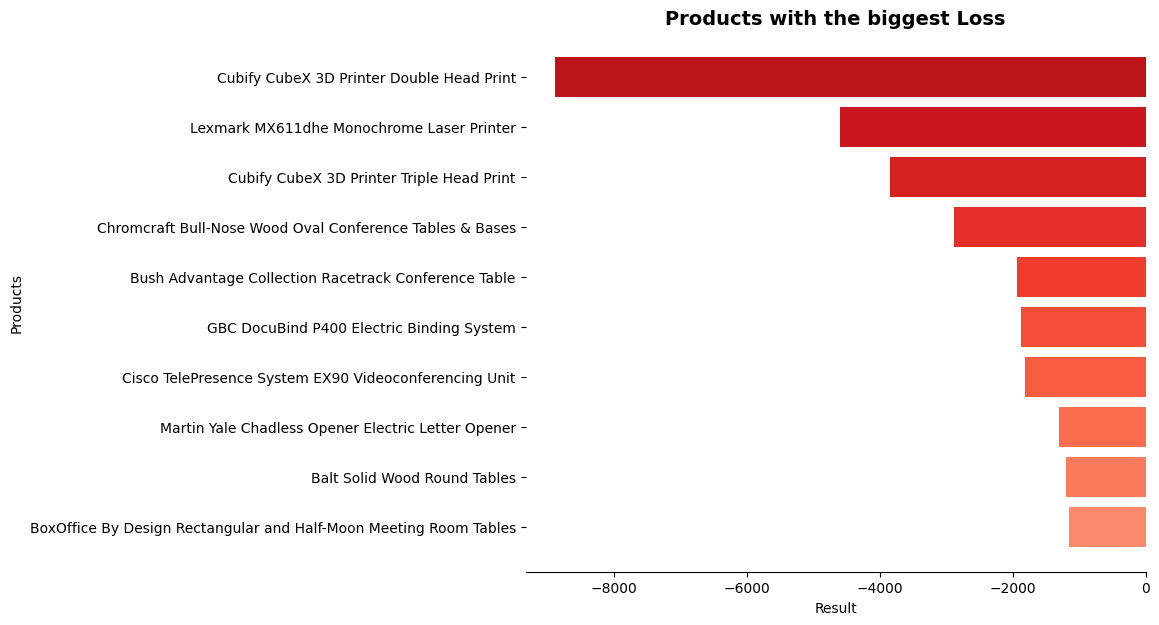

In [42]:
top_loss_products = df.groupby(by=['product_name'])['profit'].sum().sort_values().head(10)

cmap_red = cm.Reds
red_colors = [cmap_red(i) for i in np.linspace(0.8, 0.4, len(profit_clients))]

fig, ax = plt.subplots(figsize=(8,7))

ax.barh(top_loss_products.index, top_loss_products.values, color=red_colors)
ax.invert_yaxis()
ax.set_title('Products with the biggest Loss', fontsize=14, fontweight='bold')
ax.set_xlabel('Result')
ax.set_ylabel('Products')
for spine in ['left','right','top']:
    ax.spines[spine].set_visible(False)

## **Time Series Analysis**

##### 1. How did the company's sales and profit perform month-by-month between 2014 and 2017?

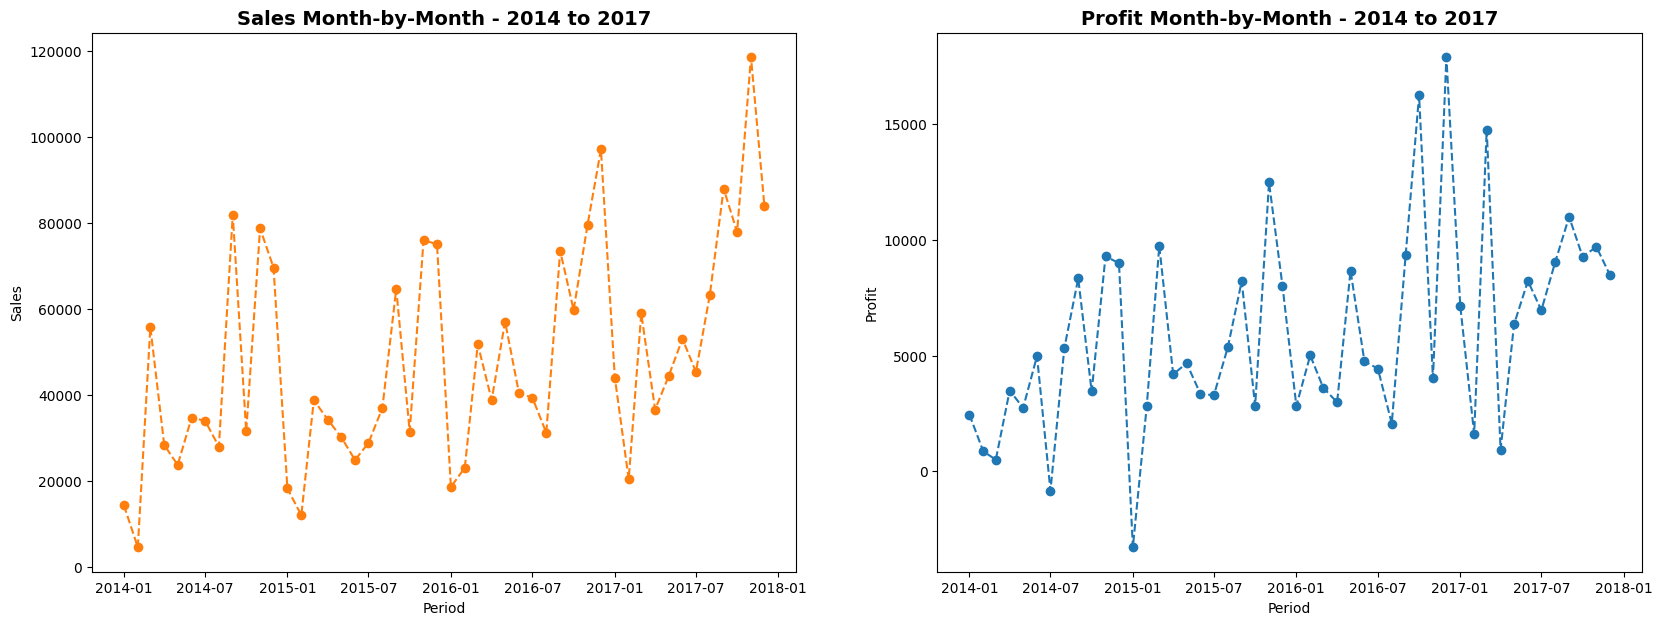

In [43]:
sales = df.groupby(by=['year_month'])['sales'].sum()
sales.index = sales.index.to_timestamp()

profit = df.groupby(by=['year_month'])['profit'].sum()
profit.index = profit.index.to_timestamp()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))

# Plot - Sales
ax1.plot(sales.index, sales.values, color=sales_color, marker='o', linestyle='--')
ax1.set_title('Sales Month-by-Month - 2014 to 2017', fontsize=14, fontweight='bold')
ax1.set_xlabel('Period')
ax1.set_ylabel('Sales')

# Plot - Profit
ax2.plot(profit.index, profit.values, color=profit_color, marker='o', linestyle='--')
ax2.set_title('Profit Month-by-Month - 2014 to 2017', fontsize=14, fontweight='bold')
ax2.set_xlabel('Period')
ax2.set_ylabel('Profit');

##### 2. Is there seasonality in the company's sales?

Yes. The chart shows sales peaks between November and December and drops at the beginning of the year, a pattern that repeats in most years. 
This indicates that sales exhibit seasonality, with higher activity at the end of the year and lower activity in the first months.

##### 3. How have the company's total sales and total profit evolved over the years?

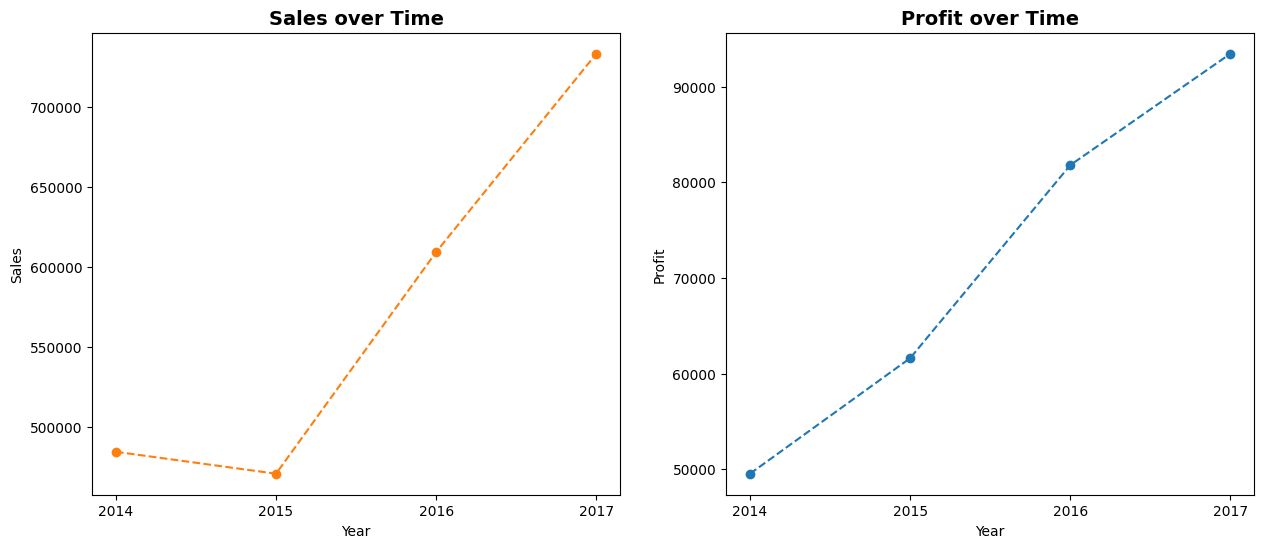

In [44]:
# Group sales and profit by year
sales_year = df.groupby(by=['year'])['sales'].sum()
profit_year = df.groupby(by=['year'])['profit'].sum()
discount_year = df.groupby(by=['year'])['discount'].mean()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

# Plot - Sales
ax1.plot(sales_year.index, sales_year.values, color=sales_color, marker='o', linestyle='--')
ax1.set_title('Sales over Time', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Sales')
ax1.set_xticks(sales_year.index) 

# Plot - Profit
ax2.plot(profit_year.index, profit_year.values, color=profit_color, marker='o', linestyle='--')
ax2.set_title('Profit over Time', fontsize=14, fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Profit')
ax2.set_xticks(profit_year.index);

## **Logistics and Operational Analysis**

##### 1. What is the most frequently used shipping mode?

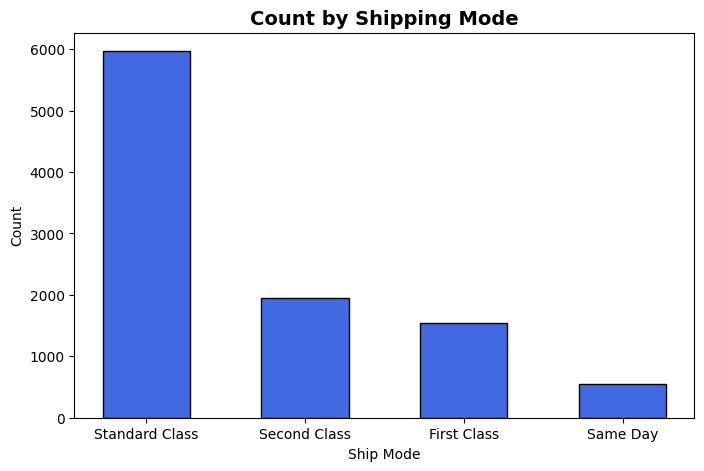

In [45]:
ship_mode = df['ship_mode'].value_counts()

fig, ax = plt.subplots(figsize=(8,5))

ax.bar(ship_mode.index, ship_mode.values, color='royalblue', edgecolor='black', width=0.55)
ax.set_title('Count by Shipping Mode', fontsize=14, fontweight='bold')
ax.set_xlabel('Ship Mode')
ax.set_ylabel('Count');

##### 2. What is the average shipping time for products?

In [46]:
print(f"{(df['shipping_time'].dt.total_seconds()/86400).mean().round()} days")

4.0 days


##### 3. What is the average time, in days, required for shipping products in each shipping mode?

In [47]:
shipping_time_df = df.groupby(by=['ship_mode']).agg(avg_shipping_time=('shipping_time', 'mean')).sort_values(by='avg_shipping_time').reset_index()

shipping_time_df['avg_shipping_time'] = (shipping_time_df['avg_shipping_time']
                                      .dt.total_seconds() / 86400).round(1)

shipping_time_df

,ship_mode,avg_shipping_time
0,Same Day,0.0
1,First Class,2.2
2,Second Class,3.2
3,Standard Class,5.0


## **Correlation Analysis** 

##### 1. What is the relationship between the variables (correlation matrix)?

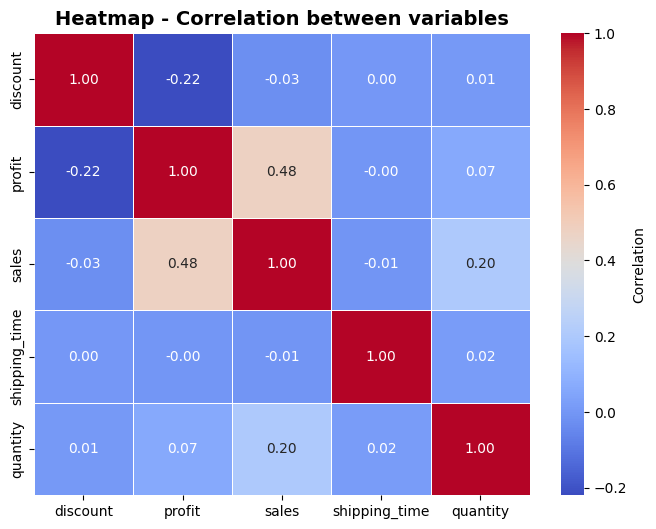

In [48]:
corr = df[['discount', 'profit', 'sales', 'shipping_time','quantity']].corr()

fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(
    corr,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5,
    cbar_kws={'label': 'Correlation'}
)

ax.set_title('Heatmap - Correlation between variables', fontsize=14, fontweight='bold');

##### 2. Is there any relationship between the discount policy and the profit obtained?

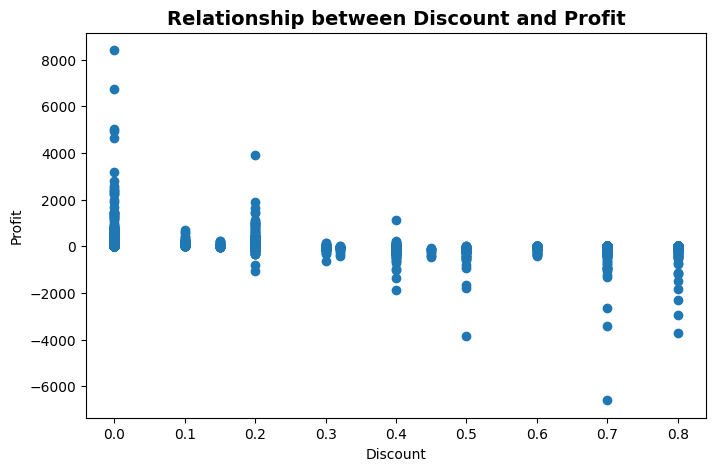

In [49]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(df['discount'], df['profit'])
ax.set_xlabel('Discount')
ax.set_ylabel('Profit')
ax.set_title('Relationship between Discount and Profit', fontsize=14, fontweight='bold');

##### Yes. Higher discounts have a negative impact on profitability.
Above 30% discount, profit tends toward zero. Above 40%, most orders start generating a loss.  
It is recommended to review the discount policy and establish maximum limits per category or product type.